In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## The Titanic

importing the dataset and the libraries.

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [38]:
#importing the dataset to a variable
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# save PassengerId 
passengerId = test.PassengerId

# merge train and test
df = train.append(test, ignore_index=True)

# create indexes to separate data later on
train_idx = len(train)
test_idx = len(df) - len(test)

#### Data Dictionary

* PassengerId: ID of the passenger
* Survived: Did the passenger survived the disaster?
   * 0 = No
   * 1 = Yes
* Pclass: Classe do bilhete
   * 1 = First Class
   * 2 = Second Class
   * 3 = Third Class
* Name: Name of the passenger
* Sex: Sex of the passenger
* Age: Age of the passagenr
* SibSp: Quantity of spouses and brothers onboard
* Parch: Quantity de fathers and sons onboard
* Ticket: Number of the ticket
* Fare: Price of the ticket
* Cabin: Cabin number 
* Embarked: Where did the passenger embarked
   * C = Cherbourg
   * Q = Queenstown
   * S = Southampton

### 1. exploring the data

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('The dataset has: {} rows'.format(df.shape[0]))
print('The dataset has: {} features'.format(df.shape[1]))

The dataset has: 1309 rows
The dataset has: 12 features


In [6]:
print('The train dataset has: {} rows'.format(train.shape[0]))
print('The train dataset has: {} features'.format(train.shape[1]))

The train dataset has: 891 rows
The train dataset has: 12 features


verifiying datatypes 

In [7]:
##
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Null values in the dataset


In [8]:
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

Most of the Cabin data is missing. Also, 177 Age entries are missing from the dataset.

### 1.1 More about the data

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### 1.2 Visualizing the data

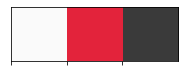

In [10]:
colors = ["#fafafa","#e3233b","#3a3a3a"]
sns.palplot(colors)

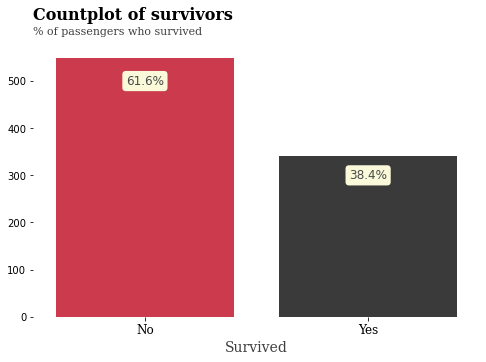

In [39]:

survived = train.Survived.value_counts(1)[0]
died = train.Survived.value_counts(1)[1]

#plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
g = sns.countplot(x=train.Survived, palette=colors[1:3]);

#text
fig.text(0.125, 0.95, 'Countplot of survivors', fontsize=16, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.91, '% of passengers who survived', fontsize=11, fontweight='light', fontfamily='serif', alpha=.75)


#annot
ax.annotate('{:.1%}'.format(survived), xy=(1, 1),xytext=(0, 500),
            va = 'center', ha='center',
            color='#4a4a4a', fontsize=12,
            bbox=dict(boxstyle='round', pad=0.30, facecolor='#fafada', linewidth=0))

ax.annotate('{:.1%}'.format(died), xy=(1, 1),xytext=(1, 300),
            va = 'center', ha='center',
            color='#4a4a4a', fontsize=12,
            bbox=dict(boxstyle='round', pad=0.30, facecolor='#fafada', linewidth=0))

#remove spines
spines = ["top","right","left","bottom"]
for s in spines:
    ax.spines[s].set_visible(False)


#x axis labels
ax.set_xlabel('Survived', fontfamily='serif', fontsize=14,  alpha=.75)
ax.set_ylabel('')
ax.set_xticklabels(['No', 'Yes'], fontsize=12, fontfamily='serif')

#show
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


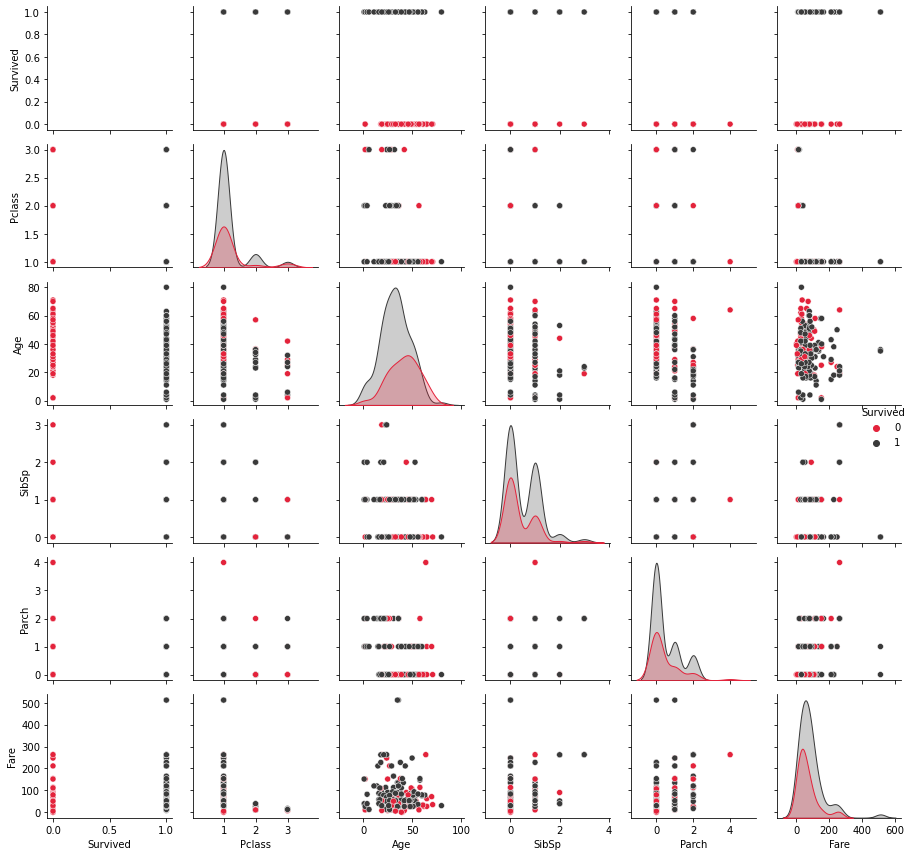

In [40]:
cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
g = sns.pairplot(data=train.dropna(), vars=cols, height=2,
                 hue='Survived', palette=colors[1:3], kind="scatter");


plt.tight_layout()

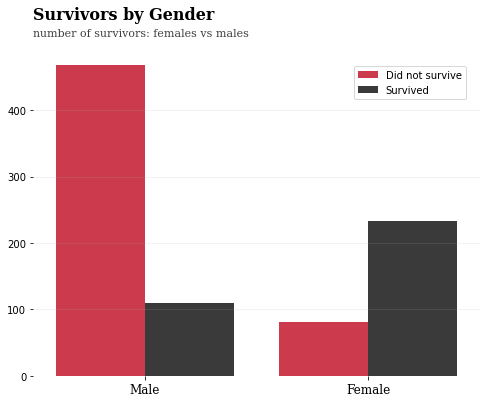

% of women survived: 0.7420382165605095


In [41]:
fig ,ax = plt.subplots(figsize=(8,6))
g2 = sns.countplot('Sex',data=train, hue='Survived', palette=colors[1:3])

#text
fig.text(0.125, 0.95, 'Survivors by Gender', fontsize=16, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.91, 'number of survivors: females vs males', fontsize=11, fontweight='light', fontfamily='serif', alpha=.75)


#x axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(['Male', 'Female'], fontsize=12, fontfamily='serif')

#set legend
ax.legend(['Did not survive', 'Survived'],bbox_to_anchor=(0.98, 0.965))


#remove spines
for s in spines:
    ax.spines[s].set_visible(False)


#grid
ax.grid(axis='y', linestyle='-', alpha=0.2)


#show
plt.show();

women = train.loc[train.Sex == 'female']["Survived"]

rate_women = sum(women)/len(women)

print("% of women survived:", rate_women)

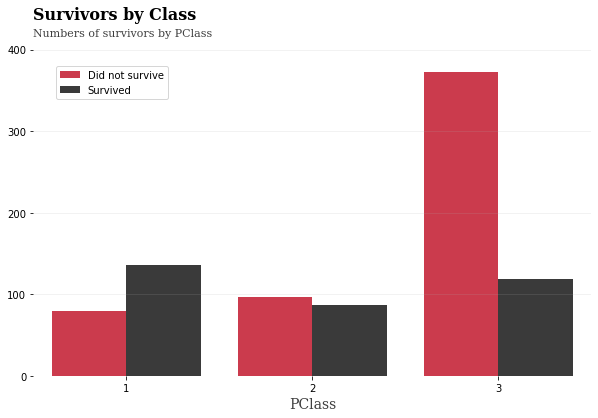

In [14]:
fig ,ax = plt.subplots(figsize=(10,6))
g2 = sns.countplot('Pclass',data=train, hue='Survived', palette=colors[1:3])

#text
fig.text(0.125, 0.95, 'Survivors by Class', fontsize=16, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.91, 'Numbers of survivors by PClass', fontsize=11, fontweight='light', fontfamily='serif', alpha=.75)


#axis labels
ax.set_xlabel('PClass', fontsize=14, fontfamily='serif', alpha=.75)
ax.set_ylabel('')

#spines
for s in spines:
    ax.spines[s].set_visible(False)


#grids
grid_y_ticks = np.arange(0, 450, 100)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.2)

#set legend
ax.legend(['Did not survive', 'Survived'],bbox_to_anchor=(0.25, 0.965))

#show
plt.show()

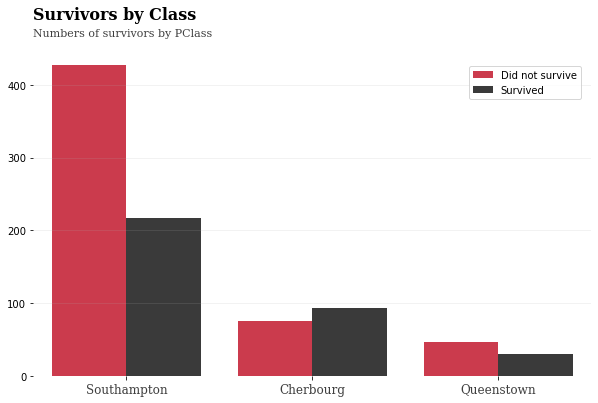

In [42]:
fig ,ax = plt.subplots(figsize=(10,6))
g2 = sns.countplot('Embarked',data=train, hue='Survived', palette=colors[1:3])

#text
fig.text(0.125, 0.95, 'Survivors by Class', fontsize=16, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.91, 'Numbers of survivors by PClass', fontsize=11, fontweight='light', fontfamily='serif', alpha=.75)


#axis labels
ax.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'], fontsize=12, fontfamily='serif',alpha=.75)
ax.set_ylabel('')
ax.set_xlabel('')

#spines
for s in spines:
    ax.spines[s].set_visible(False)


#grids
grid_y_ticks = np.arange(0, 450, 100)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.2)

#set legend
ax.legend(['Did not survive', 'Survived'],bbox_to_anchor=(0.99, 0.965))

#show
plt.show()

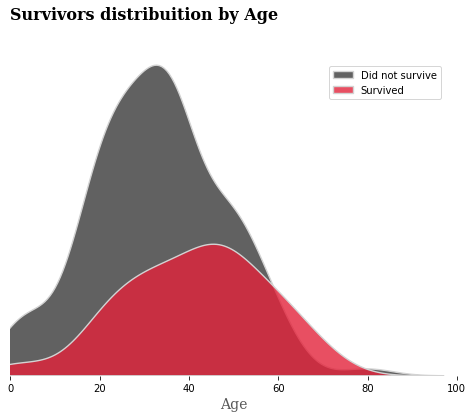

In [43]:
fig, ax = plt.subplots(figsize=(8,6))

g = sns.kdeplot(data=train.dropna(), x='Age', hue='Survived', 
                fill=True, lw=1.4, edgecolor='lightgray', palette=(["#e3233b","#3a3a3a"]), alpha=0.8)
        
ax.set_xlim(0,100)


#text
fig.text(0.125, 0.95, 'Survivors distribuition by Age', fontsize=16, fontweight='bold', fontfamily='serif')
#fig.text(0.125, 0.91, 'Numbers of survivors by Age', fontsize=11, fontweight='light', fontfamily='serif', alpha=.75)


#set legend
ax.legend(['Did not survive', 'Survived'], bbox_to_anchor=(0.975, 0.965))


#spines
for s in spines:
    ax.spines[s].set_visible(False)

#axis labels
ax.set_xlabel('Age', fontsize=14, fontfamily='serif', alpha=.65)
ax.set_ylabel('')

#remove yticks
ax.set_yticks([])

plt.show();

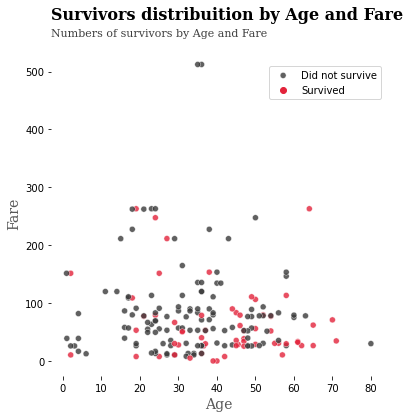

In [98]:
fig, ax = plt.subplots(figsize=(6,6))
g = sns.scatterplot(data=train.dropna(), x='Age', y='Fare', hue='Survived',
            palette=(["#e3233b","#3a3a3a"]), alpha=0.8)


#text
fig.text(0.125, 0.95, 'Survivors distribuition by Age and Fare', fontsize=16, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.91, 'Numbers of survivors by Age and Fare', fontsize=11, fontweight='light', fontfamily='serif', alpha=.75)


#set legend
ax.legend(['Did not survive', 'Survived'], bbox_to_anchor=(1, 0.965))


#spines
for s in spines:
    ax.spines[s].set_visible(False)

#axis labels
ax.set_xlabel('Age', fontsize=14, fontfamily='serif', alpha=.65)
ax.set_ylabel('Fare', fontsize=14, fontfamily='serif', alpha=.65)



#plot
plt.show()

In [17]:
train_clean = train.copy()

train_clean['Sex_Dummy'] = train_clean['Sex'].map({'male':0, 'female':1})
train_clean['Embarked'] = train_clean['Embarked'].fillna(train_clean['Embarked'].mode())
train_clean['Embarked'] = train_clean['Embarked'].map({'S':0, 'C':1, 'Q':2})
train_clean['FamilySize'] = train_clean['Parch'] + train_clean['SibSp'] +1
train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Dummy,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,0,1


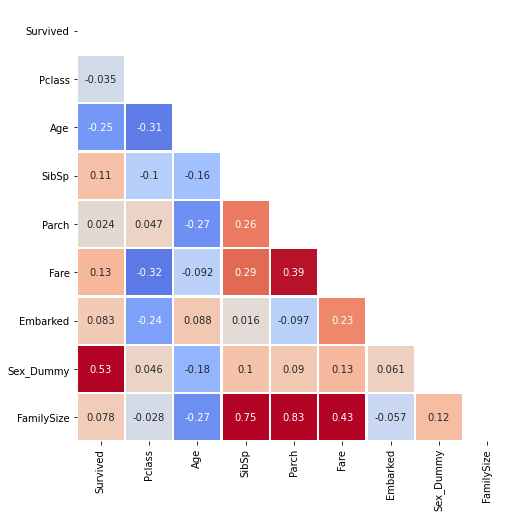

In [18]:
fig, ax = plt.subplots(figsize=(8,8)) 

# Calculate correlation between each pair of variable
corr_matrix= train_clean.dropna().drop('PassengerId',axis=1).corr()
 
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True


# Draw the heatmap with the mask
sns.heatmap(corr_matrix, 
            mask=mask, 
            square=True, 
            cmap='coolwarm',
            cbar=False,
            vmax=0.4, vmin=-0.4,
            linewidth=1.5,
            annot=True)

ax.set_facecolor('white')
plt.show();

### 2. Cleaning the data

In [19]:
df_clean = df.copy()

#drop cabin and Ticket
df_clean = df_clean.drop(['Cabin', 'Ticket'], axis=1)

#extracting Name
df_clean['Titles'] = df_clean['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df_clean = df_clean.drop(['Name'], axis=1)

#Fill Age Nulls
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

#Change Sex to numbers
df_clean['Sex'] = df_clean['Sex'].map({'male':0, 'female':1})

#fill Fare
df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)


#Fill 2 Embarked null
df_clean['Embarked'].fillna('S', inplace=True)

#Combining SibSp and Parch fields
df_clean['FamilySize'] = df_clean['Parch'] + df_clean['SibSp'] +1

In [20]:
display(df_clean.head())
print(df_clean.shape)
print('Describe Age',df_clean.Age.describe())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,FamilySize
0,1,0.0,3,0,22.0,1,0,7.2500,S,Mr,2
1,2,1.0,1,1,38.0,1,0,71.2833,C,Mrs,2
2,3,1.0,3,1,26.0,0,0,7.9250,S,Miss,1
3,4,1.0,1,1,35.0,1,0,53.1000,S,Mrs,2
4,5,0.0,3,0,35.0,0,0,8.0500,S,Mr,1


(1309, 11)
Describe Age count    1309.000000
mean       29.503186
std        12.905241
min         0.170000
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64


In [21]:
df_clean['Titles'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Mme               1
Sir               1
Capt              1
Don               1
Lady              1
Dona              1
the Countess      1
Jonkheer          1
Name: Titles, dtype: int64

In [22]:
df_clean['Titles'] = df_clean['Titles'].map({
    'Mr' : 'Mr',
    'Miss' : 'Miss',
    'Mrs' : 'Mrs',
    'Master' : 'Maser',
    'Rev'  : 'Officer',
    'Dr' : 'Dr',
    'Col' : 'Officer',
    'Mlle' : 'Miss',
    'Ms' : 'Mrs',   
    'Dona' : 'Aristocrat',
    'Don' : 'Aristocrat',
    'Sir' : 'Aristocrat',
    'Lady' : 'Aristocrat',
    'Jonkheer' : 'Aristocrat',
    'Major' : 'Officer',
    'Capt' : 'Officer',
    'Mme' : 'Mr',
    'the Countess' : 'Aristocrat'
    })



In [23]:
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,FamilySize
0,1,0.0,3,0,22.0,1,0,7.2500,S,Mr,2
1,2,1.0,1,1,38.0,1,0,71.2833,C,Mrs,2
2,3,1.0,3,1,26.0,0,0,7.9250,S,Miss,1
3,4,1.0,1,1,35.0,1,0,53.1000,S,Mrs,2
4,5,0.0,3,0,35.0,0,0,8.0500,S,Mr,1


In [24]:
df_dummies = df_clean.copy()

pclass_dummies = pd.get_dummies(df_clean.Pclass, prefix="Class")
title_dummies = pd.get_dummies(df_clean.Titles, prefix="Title")
embarked_dummies = pd.get_dummies(df_clean.Embarked, prefix="Embarked")

In [25]:
df_dummies = pd.concat([df_dummies, pclass_dummies, title_dummies, embarked_dummies], axis=1)

df_dummies = df_dummies.drop(['PassengerId', 'Pclass', 'Titles', 'Embarked', 'Parch', 'SibSp'], axis=1)

df_dummies.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'FamilySize', 'Class_1', 'Class_2',
       'Class_3', 'Title_Aristocrat', 'Title_Dr', 'Title_Maser', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

### 3 Time to predict

Recovering train and test datasets

In [26]:
train = df_dummies[ :train_idx]
test = df_dummies[test_idx: ]

In [27]:
print('Train Size:', train.shape)
print('Tests Size:', test.shape)

Train Size: (891, 18)
Tests Size: (418, 18)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [29]:
#1 Select the model
rf = RandomForestClassifier(max_depth= 7, max_features= 11, n_estimators= 100)

#2 split X, y
X_train = train.drop('Survived', axis=1)
y_train = train.Survived.values

X_test = test.drop('Survived', axis=1)


In [30]:

rf = RandomForestClassifier(random_state=0)

d = dict(max_depth=range(2,20,2),
         max_features=range(2,13,1),
         n_estimators=range(10,100,10))

clf = RandomizedSearchCV(rf, d, random_state=0)
search = clf.fit(X_train, y_train)
search.best_params_

{'n_estimators': 80, 'max_features': 9, 'max_depth': 8}

### XGBoost Model

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_train)

In [ ]:
rf = RandomForestClassifier(n_estimators=80, max_features=9, max_depth=8,random_state=0)

rf.fit(X_train, y_train)

In [ ]:
print(classification_report(y_pred, y_train))
print(classification_report(y_pred_xgb, y_train))

In [ ]:
y_pred_test_xgb = xgb.predict(X_test).astype(int)

In [ ]:
# dataframe with predictions
submission = pd.DataFrame({'PassengerId': passengerId, 'Survived': y_pred_test_xgb})

# save to csv
submission.to_csv('./Submission20032020-xgb.csv', index=False)                  
                  